In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import statistics as stats
import math
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas_profiling
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', None)


In [2]:
df_1 = pd.read_csv('data/measurements.csv')

In [3]:
df_2 = pd.read_excel('data/measurements2.xlsx')

In [4]:
df_1

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [5]:
type(df_1)

pandas.core.frame.DataFrame

In [6]:
df_1.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [7]:
col_to_numeric = ['temp_inside', "distance", "consume"]

In [8]:
for col in col_to_numeric:
    for row in df_1[col]:
        df_1[col] = df_1[col].str.replace(",",".")
    else:
        pass
        
    df_1[col] =  pd.to_numeric(df_1[col], errors='coerce')

In [9]:
df_1.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters     object
refill gas        object
dtype: object

In [10]:
df_2

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [11]:
df_2.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

In [12]:
df = pd.concat([df_1, df_2], axis =0)

In [13]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [14]:
df.shape

(776, 12)

In [15]:
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside       24
temp_outside       0
specials         590
gas_type           0
AC                 0
rain               0
sun                0
refill liters    750
refill gas       750
dtype: int64

In [16]:
df.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters     object
refill gas        object
dtype: object

In [17]:
df.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
count,776.000000,776.000000,776.000000,752.000000,776.000000,776.00000,776.000000,776.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.07732,0.123711,0.082474
std,22.653208,1.032505,13.589747,1.009782,6.987030,0.26727,0.329464,0.275263
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.00000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.00000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.00000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.00000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.00000,1.000000,1.000000


In [18]:
df["refill liters"].value_counts(dropna=False)

NaN     750
45        2
37.7      2
37,7      2
39.0      2
39        2
45.0      2
37.0      1
41.0      1
10.0      1
38.3      1
38.0      1
37,2      1
37.6      1
37        1
41        1
10        1
38,3      1
38        1
37,6      1
37.2      1
Name: refill liters, dtype: int64

In [19]:
df["refill gas"].value_counts(dropna=False)

NaN     750
SP98     16
E10      10
Name: refill gas, dtype: int64

In [20]:
df["specials"].value_counts(dropna=False)

NaN                   590
rain                   64
sun                    54
AC rain                18
ac                     16
AC                     12
snow                    6
sun ac                  6
AC snow                 2
half rain half sun      2
AC sun                  2
AC Sun                  2
ac rain                 2
Name: specials, dtype: int64

In [21]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [22]:
df.temp_inside = df.temp_inside.fillna(np.mean(df.temp_inside))

In [23]:
df['specials'] = df['specials'].fillna("unknown")

In [24]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,unknown,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,unknown,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,unknown,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,unknown,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,unknown,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,unknown,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,unknown,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [ ]:
# for i in df.columns:
#     if(i!='total_claim_amount'):
#         df.drop(['refill liters'], axis= 1)
#         df.drop(['refill gas'], axis= 1)
#         #gapminder_ocean.drop(['pop'], axis=1)
#         sns.countplot(x=i, data = df)
#         plt.show()
#     else:
#         break

<AxesSubplot:xlabel='gas_type', ylabel='count'>

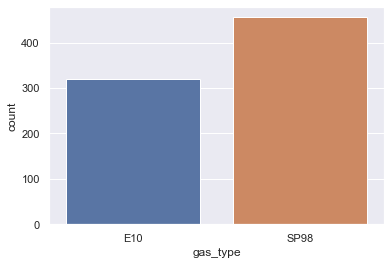

In [27]:
sns.countplot(x=df['gas_type'], data = df)

In [28]:
df['gas_type'].value_counts()

SP98    456
E10     320
Name: gas_type, dtype: int64

<AxesSubplot:xlabel='consume', ylabel='count'>

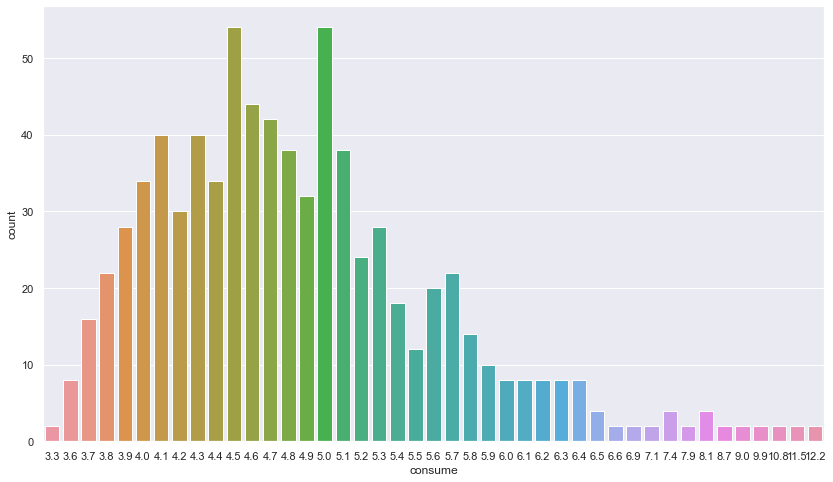

In [42]:
plt.figure(figsize=(14,8))
sns.countplot(x=df['consume'], data = df)


<AxesSubplot:xlabel='specials', ylabel='count'>

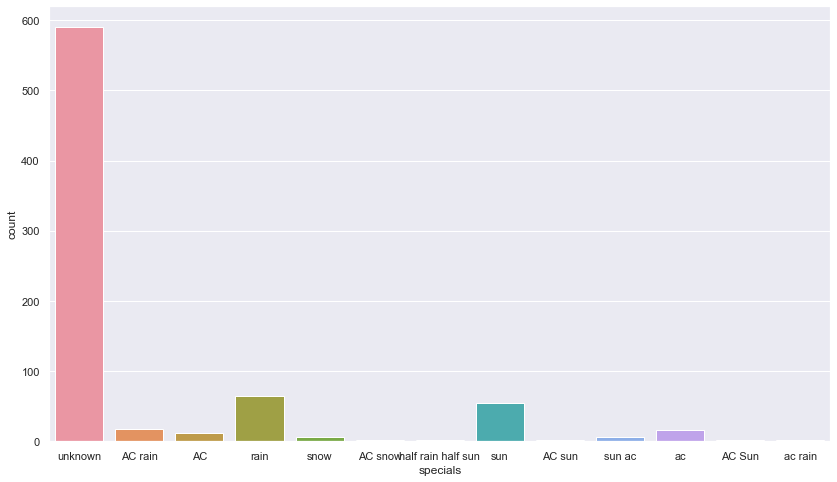

In [43]:
plt.figure(figsize=(14,8))
sns.countplot(x=df['specials'], data = df)

In [44]:
df['specials'].value_counts()

unknown               590
rain                   64
sun                    54
AC rain                18
ac                     16
AC                     12
snow                    6
sun ac                  6
AC snow                 2
half rain half sun      2
AC sun                  2
AC Sun                  2
ac rain                 2
Name: specials, dtype: int64